In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast

In [2]:
df_gold = pd.read_csv("../dataset/task_b+c/data/challenge_data/clinicalnlp_taskB_test1.csv")
df_pred = pd.read_csv("../outputs/taskB_run1.csv")

In [3]:
df_merged = df_gold.rename(columns={"encounter_id": "EncounterID", "note": "GoldNote"}).merge(
    df_pred[["EncounterID", "SystemOutput"]], on="EncounterID"
)

In [4]:
df_merged.head()

,dataset,EncounterID,dialogue,GoldNote,SystemOutput
0,virtassist,D2N088,"[doctor] hi , andrew . how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nUpper respiratory infec...,Dialogue: andrew is a 59-year-old male with a ...
1,virtassist,D2N089,"[doctor] hi andrea , how are you ?\r\n[patient...",CHIEF COMPLAINT\r\n\r\nAnnual exam.\r\n\r\nHIS...,Dialogue: [doctor] hi andrea is a 52-year-old ...
2,virtassist,D2N090,"[doctor] hi , albert . how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nER follow-up.\r\n\r\nHI...,"Dialogue: [doctor] hi, albert, who is a 62-yea..."
3,virtassist,D2N091,"[doctor] hi jerry , how are you doing ?\r\n[pa...",CHIEF COMPLAINT\r\n\r\nAnnual exam.\r\n\r\nHIS...,Dialogue: [doctor] hi jerry is a 54 year old m...
4,virtassist,D2N092,"[doctor] hello , mrs . martinez . good to see ...",CC:\r\n\r\nRight arm pain.\r\n\r\nHPI:\r\n\r\n...,"Dialogue: [doctor] hello, mrs martinez, a 43-y..."


In [8]:
with open("../default_results.json", "r") as f:
    metrics = json.load(f)

print("Global Evaluation Metrics:")
for k, v in metrics["all"].items():
    print(f"{k}: {v:.4f}")

Global Evaluation Metrics:
rouge1: 0.3349
rouge2: 0.1576
rougeL: 0.2837
rougeLsum: 0.2837
bertscore_precision: 0.7041
bertscore_recall: 0.6598
bertscore_f1: 0.6751
bleurt: 0.5024


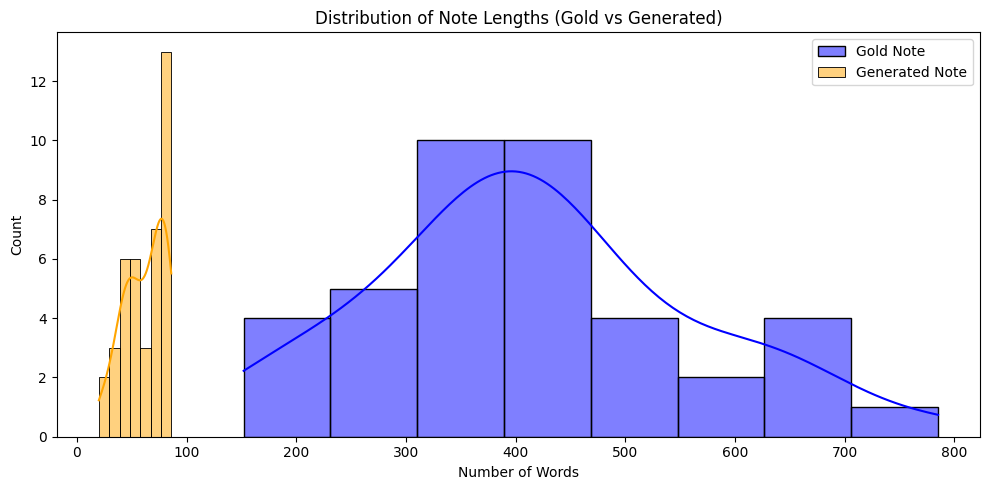

In [9]:
# Compute lengths
df_merged["GoldLength"] = df_merged["GoldNote"].str.split().apply(len)
df_merged["PredLength"] = df_merged["SystemOutput"].str.split().apply(len)

# Plot length distributions
plt.figure(figsize=(10, 5))
sns.histplot(df_merged["GoldLength"], label="Gold Note", color="blue", kde=True)
sns.histplot(df_merged["PredLength"], label="Generated Note", color="orange", kde=True)
plt.legend()
plt.title("Distribution of Note Lengths (Gold vs Generated)")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

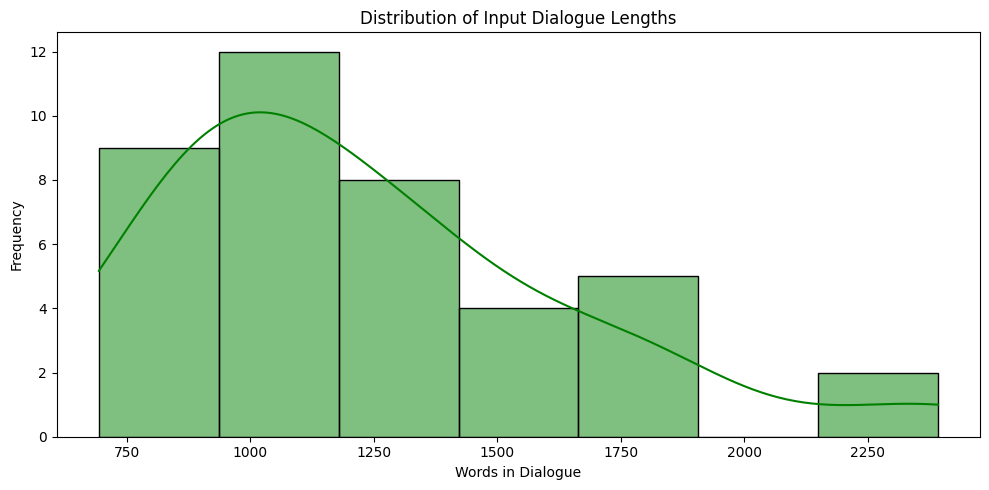

In [10]:
# Dialogue Length Distribution
df_merged["DialogueLength"] = df_merged["dialogue"].str.split().apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df_merged["DialogueLength"], color="green", kde=True)
plt.title("Distribution of Input Dialogue Lengths")
plt.xlabel("Words in Dialogue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

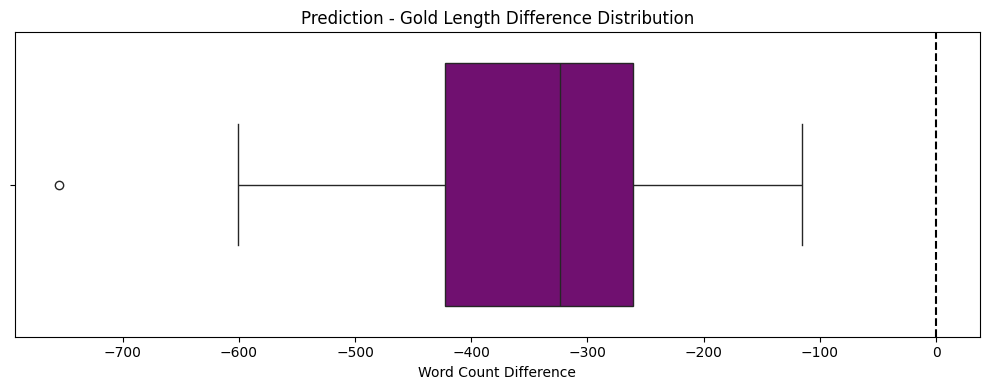

In [11]:
# Length Difference Analysis
df_merged["LengthDiff"] = df_merged["PredLength"] - df_merged["GoldLength"]

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_merged["LengthDiff"], color="purple")
plt.axvline(0, linestyle="--", color="black")
plt.title("Prediction - Gold Length Difference Distribution")
plt.xlabel("Word Count Difference")
plt.tight_layout()
plt.show()

In [13]:
# Examples: Qualitative Inspection
for i in [0, 1, 5, 10, 15]:
    row = df_merged.iloc[i]
    print(f"EncounterID: {row['EncounterID']}")
    print("Dialogue:")
    print(row["dialogue"][:500] + "..." if len(row["dialogue"]) > 500 else row["dialogue"])
    print("Gold Note:")
    print(row["GoldNote"])
    print("Generated Note:")
    print(row["SystemOutput"])
    print("=" * 100)

EncounterID: D2N088
Dialogue:
[doctor] hi , andrew . how are you ?
[patient] hey , good to see you .
[doctor] i'm doing well , i'm doing well .
[patient] good .
[doctor] so , i know the nurse told you about dax . i'd like to tell dax a little bit about you .
[patient] sure .
[doctor] uh , so , andrew is a 59-year-old male with a past medical history , significant for depression , type two diabetes , and hypertension who presents today with an upper respiratory infection . so , andrew , what's going on ?
[patient] yeah...
Gold Note:
CHIEF COMPLAINT

Upper respiratory infection.

HISTORY OF PRESENT ILLNESS

Andrew Campbell is a 59-year-old male with a past medical history significant for depression, type 2 diabetes, and hypertension. He presents today with an upper respiratory infection.

The patient reports that he has been doing a bit of work out in the yard in the last week or so. He started to feel really tired and short of breath. The patient denies coughing up anything, but he feel

In [14]:
# Save merged results
df_merged.to_csv("../outputs/taskB_merged_gold_pred.csv", index=False)
print("Merged file saved to: ../outputs/taskB_merged_gold_pred.csv")


Merged file saved to: ../outputs/taskB_merged_gold_pred.csv
